In [3]:
#Here we implement method to smash a 2Dx2D hamatonian to a smaller H such state ony effect of lower eigenvalue are acounter in that
#import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as cp
import numpy as np
import scipy as sp
import scipy.special as sps

'''Declearning Constand and Inputs =================='''
t1= time.time()
# Constants (all MKS, except energy which is in eV)
hbar = 1.06e-34
q = 1.6e-19
IE = (q*q) / (2 * cp.pi * hbar)
Ef = 2.25
kT = 0.025
Ecc = 3.02

#Effective mass in lattice for insulator and ferromagnet
mc = 0.18*9.1e-31
mf = 0.8*9.1e-31

# Inpupt a =size of lattice
a = 0.25e-10
Nr = 1000 #Number of point in radial direction
rad = 7.5*1e-9 #Radius

#t0, tm are values of t in channel and magnet repectivily (NOTE:for now we have asumme energy Ec is same in both)
t0 = (hbar**2) / (2 * mc * (a**2) * q)
tm = (hbar**2) / (2 * mf * (a**2) * q)




#Lattic point in Source, channel and Drain
NS = 2
NC = 15
ND = 2
No = NS + NC + ND


# Constructing Hamaltonian in Spatio-Eigen Basis

In [4]:
'''Creating a function that will find all of the eigenvalues less than thrushold'''
Th = 2 #Thrushold energy level
Eng = [] # List of energy

lim = 50 #max value of m that need to be check
maxm = 100 #maximum number of eigenvalues per M
perM = np.zeros(lim) #List of how many energy is contributing per angular momentum m
perMd = np.zeros(lim)
P = np.zeros(maxm)

for i in range(lim):
    P = sps.jn_zeros(i,maxm)
    for j in range(maxm):
        Et = ((P[j]*hbar)**2) / (2 * mf * ((rad)**2) * q)
        if Et<Th:
            Eng.append(Et)
            perMd[i]=(j+1)
            if i!=0:
                Eng.append(Et)
                perM[i]=2*(j+1)
            else:
                perM[i]=j+1

tild = np.zeros(lim)
for i in range(lim):
    tild[i] = int(np.sum(perM[:i]))
leng = len(Eng)
lengd  = int(np.sum(perMd))
print(leng)

557


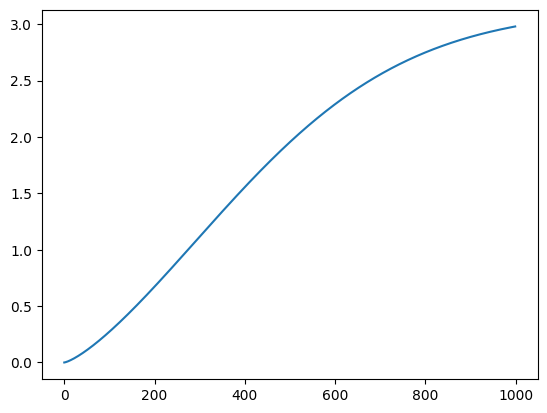

In [7]:
'''The Radial Profile of Magnetic Texture'''
X = np.linspace(0,0.55,Nr)
delt = np.pi*(2/(1+np.exp(-8*X**(1.32)))-1) #Skyrmion texture as an example 
plt.plot(delt)

In [5]:
def block_Unit(m,me,nz):
    '''This function find the block(of u) crossponding to each component of m for Unit_R'''
    '''m is azu quntum no, me is no of eigenvalues contributing, nz is texture'''
    P = sps.jn_zeros(m,me) #Zeros of bessel's function
    En = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
    X = np.linspace(0,1,Nr) #Grid from 0 to 1
    phi = np.zeros((Nr,me)) #To store eigenvector
    #Extractin crossponding eigenvector
    for i in range(me):
        gri = P[i]*X
        vect = sps.jv(m,gri) #Eigenvector corrosponding to eigenvalue
        nor = np.trapz(vect*vect*X) #finding the norm
        phi[:,i]=sps.jv(m,gri)/(nor**(1/2)) #Storing normalized vector
    
    #Contructing Unitary transformation
    Unit = np.zeros((me,me))
    for i in range(me):
        for j in range(me):
            Unit[i,j] = np.trapz(nz*phi[:,i]*phi[:,j]*X)
        
    
    return Unit

def Offblock(i,j,ni,nj,nx):
    '''This function find out the inner product of wave functin which have different m(ignoring complex part)
    i,j are the value of m for both and ni,nj are no of there state we are considering. nx is texture along radial dirtion'''
    
    X = np.linspace(0,1,Nr)
    Z0 = sps.jn_zeros(i,ni)
    Z1 = sps.jn_zeros(j,nj)
    Unit = np.zeros((ni,nj))
    for k in range(ni):
        for l in range(nj):
            #First eigenvalue
            phi = sps.jv(i,Z0[k]*X)
            nor1 = np.trapz(phi*phi*X)
            #Second eigenvalue
            phi = phi/(nor1**(1/2))
            phi2 = sps.jv(j,Z1[l]*X)
            nor2 = np.trapz(phi2*phi2*X)
            phi2=phi2/(nor2**(1/2))
            dot = np.trapz(nx*phi*phi2*X)
            Unit[k,l] = dot
    
    return Unit

In [9]:
#Contructing a full Unit_R and eigenvalue matrix
#Number of Eigenvalue we are interested
delta = 2.15 #stoner's spliting



#Magnetic Texture
nz = np.cos(delt/2) #Texture
nx = np.sin(delt/2)


theta = 0 #Angle relative to radial
intr = leng
Unit_R = np.zeros((2*intr,2*intr),dtype=complex) #Unitry transformation
Eig = np.zeros(2*intr) #To store eigenvalules
co = 0 #count number eigenvalues has been used

#We have decomposed our matrix in 2x2 matrix for up spin and down spin
#Finding the uu and dd compoenet of matrix
for i in range(lim):
    t = int(perMd[i]) #amount of eigenvalue contribute for each m
    if t==0:
        break
    if i==0:
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
        
    else:
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
        
        co+=t
        
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
    co+=t
    

    



#finding ud and du
cor=int(perM[0])
col=int(0)
#For positive m

for k in range(1,lim):
    #value of m for left and right contact's eigenvalues
    lt = int(perMd[k-1])
    rt = int(perMd[k])
    if rt==0:
        #Stop if all compoenet under thrushold is taken into acount
        break
    
    Z = Offblock(k-1,k,lt,rt,nx)
    Unit_R[col:col+lt,intr+cor:intr+cor+rt]=Z
    if k==1:
        Unit_R[cor+rt:cor+2*rt,intr+col:intr+col+lt]=Z.T
    else:
        Unit_R[cor+rt:cor+2*rt,intr+col+lt:intr+col+2*lt]=Z.T
    
    cor+=int(perM[k])
    col+=int(perM[k-1])
    
Unit_R[intr:,:intr] = -np.conj(Unit_R[:intr,intr:].T)


#Unitt_L
th=0
rot = np.array([[np.cos(th/2),np.sin(th/2)],[-np.sin(th/2),np.cos(th/2)]])

Unit_L = np.kron(rot,np.eye(intr)) 
Unit_L = Unit_R


'''Contructing Relevent Hamaltonain'''
#Channel
EigT = np.zeros(2*intr)
EigT[:intr] = Eig[:intr]
EigT[intr:] = Eig[:intr]
EigT = (mf/mc)*EigT

#Left contact
Eig_L = np.zeros(2*intr)
Eig_L[:intr] = Eig[:intr]
Eig_L[intr:] = Eig[:intr]  + delta#Increasing in energy of up spin due to ferromagnet

#Right contact
Eig_R = np.zeros(2*intr)
Eig_R[:intr] = Eig[:intr]
Eig_R[intr:] = Eig[:intr] + delta

#Channel and left contact have same eigenspace but we have to transform right contact to the basis of left contact
T_trans = np.diag(EigT+2*t0)
TL = np.diag(Eig_L+2*tm)
TL = Unit_L@TL@np.conj(Unit_L.T)
TR = np.zeros((2*intr,2*intr),dtype=complex)
TR = np.diag(Eig_R+2*tm)
TR = Unit_R@TR@np.conj(Unit_R.T)


In [10]:
#Saving relevent array as csv file
np.savetxt("Unit_R.csv", Unit_R, delimiter=",")
np.savetxt("T_trans.csv", T_trans, delimiter=",")
np.savetxt("TL.csv", TL, delimiter=",")
np.savetxt("TR.csv", TR, delimiter=",")
np.savetxt("Eig_L.csv", Eig_L, delimiter=",")
np.savetxt("Eig_R.csv", Eig_R, delimiter=",")
np.savetxt("Unit_L.csv", Unit_L, delimiter=",")

In [10]:
print(np.shape(Unit_R))

(2788, 2788)


# Spin profile Calculation

In [30]:
def Eigvector(m,me):
    '''This function find the block crossponding to each component of m for Unit_R'''
    '''m is azu quntum no, me is no of eigenvalues contributing, nz is texture'''
    P = sps.jn_zeros(m,me) #Zeros of bessel's function
    En = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
    X = np.linspace(0,1,Nr) #Grid from 0 to 1
    phi = np.zeros((Nr,me)) #To store eigenvector
    #Extractin crossponding eigenvector
    for i in range(me):
        gri = P[i]*X
        vect = sps.jv(m,gri) #Eigenvector corrosponding to eigenvalue
        nor = np.trapz(vect*vect*X) #finding the norm
        phi[:,i]=sps.jv(m,gri)/(nor**(1/2)) #Storing normalized vector
    return phi

def EigenTheta(theta):
    phi = np.zeros((Nr,intr),dtype=complex)
    co=0
    for i in range(lim):
        t = int(perMd[i])
        if t==0:
            break

        Z =Eigvector(i,t)
        if i==0:
            phi[:,co:co+t]=Z
        else:
            phi[:,co:co+t]=Z*np.exp(1j*i*theta)
            co+=t
            phi[:,co:co+t]=Z*np.exp(-1j*i*theta)

        co+=t
    
    return phi

In [31]:
Nt0 = 180 #Dividing n theta into 180 grid of 180
Nr = 250 #Radial direction as grid of Nr

Iops=np.loadtxt("Iop.csv", delimiter=",",dtype=complex)

t0_grid = np.linspace(0,2*np.pi,Nt0)
dt0 = t0_grid[1]-t0_grid[0]

X = np.linspace(0,1,Nr)

Imap = np.zeros((Nr,Nt0))
Izmap = np.zeros((Nr,Nt0))
Ixmap = np.zeros((Nr,Nt0))
Iymap = np.zeros((Nr,Nt0))
phi = np.zeros((Nr,intr),dtype=complex)


#Changing Current Operator from Spatio-Eigen Basis to Tight Binding Basis
for i in range(Nt0):
    phi = EigenTheta(t0_grid[i])
    
    #For charge current
    phi2 = phi@Iops[:intr,:intr]@np.conj(phi.T)
    phi2+= phi@Iops[intr:,intr:]@np.conj(phi.T)
    Imap[:,i] = np.diag(np.real(phi2))/(rad*rad*2*np.pi)
    #For charge current along z
    phi2 = phi@Iops[:intr,:intr]@np.conj(phi.T)
    phi2-= phi@Iops[intr:,intr:]@np.conj(phi.T)
    Izmap[:,i] = np.diag(np.real(phi2))/(rad*rad*2*np.pi)
    #for chrage current along rad
    phi2 = phi@Iops[:intr,intr:]@np.conj(phi.T)
    phi2+= phi@Iops[intr:,:intr]@np.conj(phi.T)
    Ixmap[:,i] = np.diag(np.real(phi2))/(rad*rad*2*np.pi)
    #for charge current along polar angle
    phi2 -= phi@Iops[:intr,intr:]@np.conj(phi.T)
    phi2 += phi@Iops[intr:,:intr]@np.conj(phi.T)
    Iymap[:,i] = np.diag(np.imag(phi2))/(rad*rad*2*np.pi)


#Storing current as vector
Ivec = np.zeros((Nr,3))

X = np.linspace(0,rad,Nr)
dX=X[1]-X[0]
Sp1 = np.trapz(Imap,dx=dt0) #Normlazing with 2pi

In [29]:
np.savetxt("Imap_A_1.csv", Imap, delimiter=",")
np.savetxt("Ixmap_A_1.csv", Ixmap, delimiter=",")
np.savetxt("Iymap_A_1.csv", Iymap, delimiter=",")
np.savetxt("Izmap_A_1.csv", Izmap, delimiter=",")

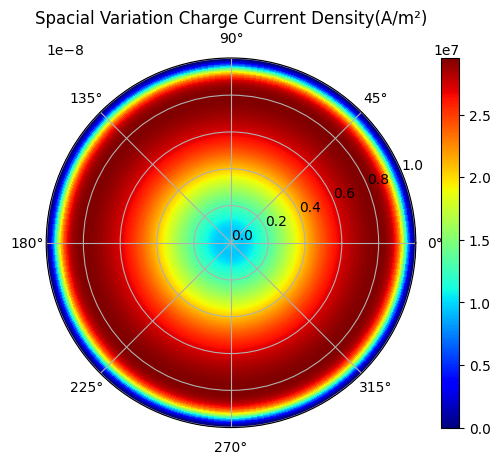

In [32]:
# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Create the colored polar plot
cax = ax.pcolormesh(t0_grid,X,Imap,cmap='jet')

# Add a colorbar
cbar = fig.colorbar(cax)

# Set title
ax.set_title('Spacial Variation Charge Current Density(A/m²)')

# Save the figure
plt.savefig('Imap_10mV_anti.png', dpi=300)

# Show the plota
plt.show()

In [ ]:
Ibn=Imap[:,0]
Iznb = Izmap[:,0]

In [59]:
Ib=Imap[:,0]
Izn=Izmap[:,0]

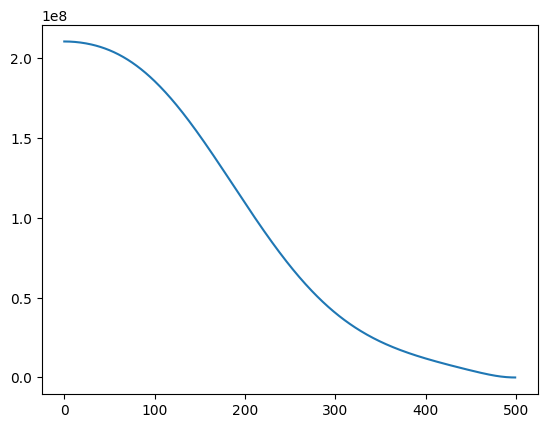

In [60]:
plt.plot(Izn)

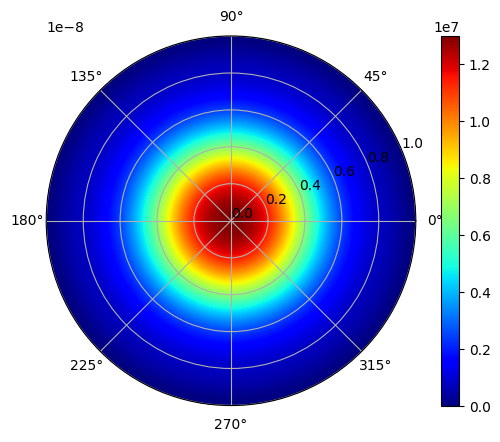

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
#Plot
cax = ax.pcolormesh(t0_grid,X,Izmap,cmap='jet')
fig.colorbar(cax)
plt.show()

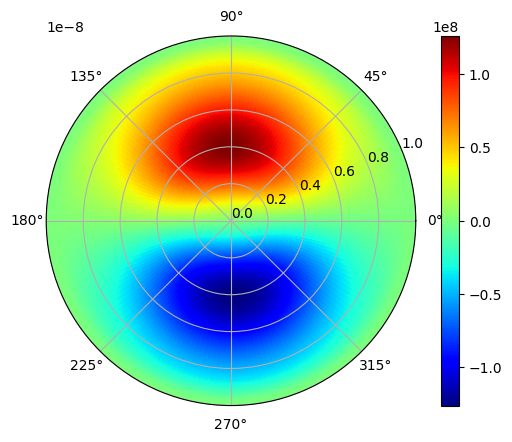

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
#Plot
cax = ax.pcolormesh(t0_grid,X,Ixmap,cmap='jet')
fig.colorbar(cax)
plt.show()

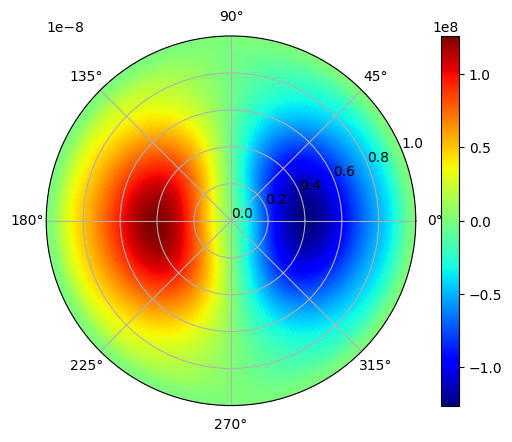

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
#Plot
cax = ax.pcolormesh(t0_grid,X,Iymap,cmap='jet')
fig.colorbar(cax)
plt.show()

In [28]:
Iplane = Ixmap - 1j*Iymap
Rot = np.exp(1j*np.outer(np.ones(Nr),t0_grid))
Ipp = Iplane*Rot
Ir = np.real(Ipp)
Ip = np.imag(Ipp)

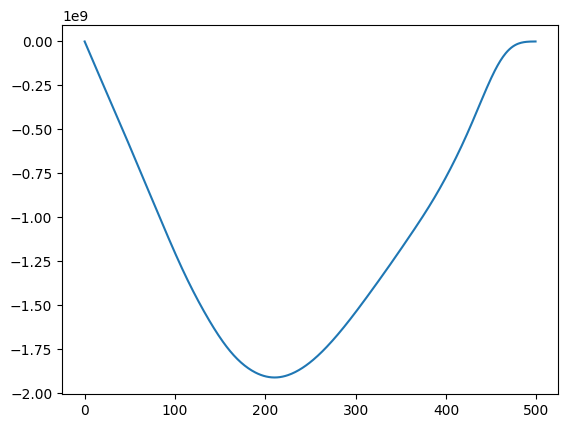

In [29]:
plt.plot(Iymap[:,0])